In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Exercise 1

### Determine PCA of a 3x2 matrix

#### define a matrix

In [4]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


#### First do it manually!

#### 1. Subtract the mean of each variable

In [5]:
column_means = np.mean(A, axis=0)
print(column_means)

[3. 4.]


#### 2. Calculate the Covariance Matrix

In [6]:
cov_matrix = np.cov(A, rowvar=False)

print(cov_matrix)

[[4. 4.]
 [4. 4.]]


#### 3. Compute the Eigenvalues and Eigenvectors

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[8. 0.]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


#### 4. project data of the original matrix to the new basis

In [8]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the number of principal components (eigenvectors) you want to keep
num_components = 1  # You can choose how many components to keep

# Project the original data onto the new basis
projected_data = np.dot(A, eigenvectors[:, :num_components])

print("Projected Data:")
print(projected_data)

Projected Data:
[[2.12132034]
 [4.94974747]
 [7.77817459]]


#### conclusion?

The code performs Principal Component Analysis (PCA) on the original data, reducing its dimensionality and represents it in a new basis where the first num_components eigenvectors capture the most significant variation in the data. This technique is commonly used for data dimensionality reduction and feature extraction, making it easier to analyze and visualize data while preserving essential information.

# Exercise 2

### Ok Let's do it again but for a larger matrix 20x5

#### Generate a dummy dataset.

In [9]:
X = np.random.randint(10,50,100).reshape(20,5)
print(X)

[[22 18 14 16 44]
 [14 36 40 11 43]
 [26 28 30 34 43]
 [33 21 13 14 22]
 [21 16 35 10 47]
 [12 48 15 37 33]
 [46 19 25 14 12]
 [47 28 11 47 24]
 [14 15 30 13 39]
 [27 39 43 47 38]
 [48 33 15 39 41]
 [30 10 40 40 18]
 [16 20 18 28 16]
 [19 34 29 41 38]
 [21 27 14 23 25]
 [19 12 35 37 13]
 [27 17 25 20 39]
 [34 16 37 47 23]
 [32 49 21 13 18]
 [21 15 33 42 43]]


#### 1. Subtract the mean of each variable

Subtract the mean of each variable from the dataset so that the dataset should be centered on the origin. Doing this proves to be very helpful when calculating the covariance matrix.

In [10]:
# Calculate the mean of each variable (column)
column_means = np.mean(X, axis=0)

# Subtract the mean of each variable from the dataset
centered_X = X - column_means

print("Centered Dataset:")
print(centered_X)

Centered Dataset:
[[ -4.45  -7.05 -12.15 -12.65  13.05]
 [-12.45  10.95  13.85 -17.65  12.05]
 [ -0.45   2.95   3.85   5.35  12.05]
 [  6.55  -4.05 -13.15 -14.65  -8.95]
 [ -5.45  -9.05   8.85 -18.65  16.05]
 [-14.45  22.95 -11.15   8.35   2.05]
 [ 19.55  -6.05  -1.15 -14.65 -18.95]
 [ 20.55   2.95 -15.15  18.35  -6.95]
 [-12.45 -10.05   3.85 -15.65   8.05]
 [  0.55  13.95  16.85  18.35   7.05]
 [ 21.55   7.95 -11.15  10.35  10.05]
 [  3.55 -15.05  13.85  11.35 -12.95]
 [-10.45  -5.05  -8.15  -0.65 -14.95]
 [ -7.45   8.95   2.85  12.35   7.05]
 [ -5.45   1.95 -12.15  -5.65  -5.95]
 [ -7.45 -13.05   8.85   8.35 -17.95]
 [  0.55  -8.05  -1.15  -8.65   8.05]
 [  7.55  -9.05  10.85  18.35  -7.95]
 [  5.55  23.95  -5.15 -15.65 -12.95]
 [ -5.45 -10.05   6.85  13.35  12.05]]


#### 2. Calculate the Covariance Matrix

Calculate the Covariance Matrix of the mean-centered data.

In [11]:
# Calculate the covariance matrix of the mean-centered data
cov_matrix = np.cov(centered_X, rowvar=False)

print("Covariance Matrix of Centered Data:")
print(cov_matrix)

Covariance Matrix of Centered Data:
[[118.99736842  -1.81315789 -30.38684211  30.27105263 -39.55526316]
 [ -1.81315789 133.41842105 -27.69210526   9.86052632  17.73947368]
 [-30.38684211 -27.69210526 108.87105263  24.10789474  20.32368421]
 [ 30.27105263   9.86052632  24.10789474 188.97631579 -11.86052632]
 [-39.55526316  17.73947368  20.32368421 -11.86052632 140.26052632]]


Note: the matrix is symmetrical

#### 3. Compute the Eigenvalues and Eigenvectors

Now, compute the Eigenvalues and Eigenvectors for the calculated Covariance matrix.

In [12]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 62.39064169  87.54357508 210.66543632 176.79561842 153.1284127 ]
Eigenvectors:
[[-0.52233775 -0.60877393 -0.44080863  0.3981347  -0.06110717]
 [-0.3464726   0.36751337 -0.01136578 -0.03752159 -0.86217957]
 [-0.72033375  0.22766407  0.02022114 -0.5118473   0.40852394]
 [ 0.29342129  0.0140777  -0.80955142 -0.50202497 -0.07939266]
 [ 0.04629519 -0.66505573  0.38700926 -0.57102029 -0.28234252]]


Note: The Eigenvectors of the Covariance matrix we get are Orthogonal to each other and each vector represents a principal axis.
A Higher Eigenvalue corresponds to a higher variability. Hence the principal axis with the higher Eigenvalue will be an axis capturing higher variability in the data.

#### 4. Sort Eigenvalues in descending order

Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.

In [13]:
# Sort the eigenvalues and their corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:")
print(sorted_eigenvalues)

print("Sorted Eigenvectors:")
print(sorted_eigenvectors)

Sorted Eigenvalues:
[210.66543632 176.79561842 153.1284127   87.54357508  62.39064169]
Sorted Eigenvectors:
[[-0.44080863  0.3981347  -0.06110717 -0.60877393 -0.52233775]
 [-0.01136578 -0.03752159 -0.86217957  0.36751337 -0.3464726 ]
 [ 0.02022114 -0.5118473   0.40852394  0.22766407 -0.72033375]
 [-0.80955142 -0.50202497 -0.07939266  0.0140777   0.29342129]
 [ 0.38700926 -0.57102029 -0.28234252 -0.66505573  0.04629519]]


Note: Each column in the Eigen vector-matrix corresponds to a principal component, so arranging them in descending order of their Eigenvalue will automatically arrange the principal component in descending order of their variability.
Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

#### 5. Select a subset from the rearranged Eigenvalue matrix

Select a subset of n first eigenvectors from the rearranged Eigenvector matrix as per our need, n is desired dimension of your final reduced data. i.e. "n_components=2" means you selected the first two principal components.

In [14]:
# Sort the eigenvalues and their corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Choose the desired dimension (n_components) for your final reduced data
n_components = 2  # You can change this value as needed

# Select the first n_components eigenvectors
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

print("Selected Eigenvectors:")
print(selected_eigenvectors)

Selected Eigenvectors:
[[-0.44080863  0.3981347 ]
 [-0.01136578 -0.03752159]
 [ 0.02022114 -0.5118473 ]
 [-0.80955142 -0.50202497]
 [ 0.38700926 -0.57102029]]


Note: The final dimensions of X_reduced will be ( 20, 2 ) and originally the data was of higher dimensions ( 20, 5 ).

#### 6. Transform the data

Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset and the Transpose of the mean-centered data. By transposing the outcome of the dot product, the result we get is the data reduced to lower dimensions from higher dimensions.

In [16]:
# Choose the desired dimension (n_components) for your final reduced data
n_components = 2  # You can change this value as needed

# Select the first n_components eigenvectors
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

# Transpose the mean-centered data and the selected eigenvectors
centered_X_transpose = centered_X.T
selected_eigenvectors_transpose = selected_eigenvectors.T

# Perform the dot product to transform the data
reduced_data = np.dot(selected_eigenvectors_transpose, centered_X_transpose)

# Transpose the result to have the data in rows and dimensions in columns
reduced_data = reduced_data.T

print("Transformed Data:")
print(reduced_data)

Transformed Data:
[[ 17.08733672   3.61057359]
 [ 24.59571915 -10.47677731]
 [  0.57504774 -11.82708942]
 [  5.28902232  21.95583403]
 [ 23.99385714  -6.16222222]
 [ -0.08301103  -6.2695697 ]
 [ -4.04619731  26.77466362]
 [-26.94347965  10.5818988 ]
 [ 21.46504927  -3.29031967]
 [-12.18712449 -22.16693026]
 [-14.30466377   3.05389124]
 [-15.31393148  -3.41427758]
 [ -0.76053496   9.06360138]
 [ -4.02961394 -14.98638794]
 [  4.40581735  10.20995519]
 [-10.09526584  -0.94838967]
 [  9.94383986   0.85544998]
 [-20.93783774  -6.88060264]
 [  4.83487255  19.19842244]
 [ -3.48890191 -18.88172384]]


# Exercise 3

### Now, let’s just combine everything above by making a function and try our Principal Component analysis from scratch on an example.

#### Create a PCA function accepting data matrix and the number of components as input arguments.

In [17]:
import numpy as np

def perform_pca(data, n_components):
    """
    Perform Principal Component Analysis (PCA) on the input data matrix.

    Parameters:
        data (numpy.ndarray): The data matrix with observations in rows and variables in columns.
        n_components (int): The number of principal components to retain.

    Returns:
        numpy.ndarray: The data transformed to the specified number of principal components.
    """
    # Calculate the mean of each variable (column)
    column_means = np.mean(data, axis=0)

    # Subtract the mean of each variable from the dataset to center it on the origin
    centered_data = data - column_means

    # Calculate the covariance matrix of the mean-centered data
    cov_matrix = np.cov(centered_data, rowvar=False)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and their corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the first n_components eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Transpose the mean-centered data and the selected eigenvectors
    centered_data_transpose = centered_data.T
    selected_eigenvectors_transpose = selected_eigenvectors.T

    # Perform the dot product to transform the data
    reduced_data = np.dot(selected_eigenvectors_transpose, centered_data_transpose)

    # Transpose the result to have the data in rows and dimensions in columns
    reduced_data = reduced_data.T

    return reduced_data


#### Let's use the IRIS dataset to test our PCA function, and by the same way see if we can classify the dataset in the projected space

In [18]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 1. prepare the dataset & target set for classification

In [20]:
from sklearn.model_selection import train_test_split
# Prepare the feature (dataset) and target variables
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['target']

# Split the data into a training set and a testing set (you can adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train (features for training), X_test (features for testing), y_train (target for training), and y_test (target for testing)

#### 2. Apply the PCA function

In [21]:
# Apply PCA to the training and testing data
n_components = 2  # Specify the number of components
X_train_pca = perform_pca(X_train, n_components)
X_test_pca = perform_pca(X_test, n_components)

# Now you have reduced-dimensional training and testing data with the specified number of principal components

#### 3. Create a Pandas Dataframe of reduced Dataset with target data

In [22]:
# Create DataFrames for reduced training and testing data
reduced_train_df = pd.DataFrame(X_train_pca, columns=['PCA_Component1', 'PCA_Component2'])
reduced_test_df = pd.DataFrame(X_test_pca, columns=['PCA_Component1', 'PCA_Component2'])

# Add the target data to the DataFrames
reduced_train_df['Target'] = y_train
reduced_test_df['Target'] = y_test

# Now you have Pandas DataFrames with the reduced dataset and the target data
print("Reduced Training Data with Target:")
print(reduced_train_df.head())

print("Reduced Testing Data with Target:")
print(reduced_test_df.head())

Reduced Training Data with Target:
   PCA_Component1  PCA_Component2       Target
0       -3.171865       -0.139597  Iris-setosa
1       -2.344768       -1.346163  Iris-setosa
2        0.971166       -0.487178  Iris-setosa
3       -2.568064       -0.024493  Iris-setosa
4       -2.952057        0.334123  Iris-setosa
Reduced Testing Data with Target:
   PCA_Component1  PCA_Component2 Target
0        0.734116        0.263547    NaN
1       -2.370212       -0.849515    NaN
2        3.611909       -0.125110    NaN
3        0.629719        0.219028    NaN
4        1.148342       -0.146674    NaN


#### 4. Vizualize the data with one and two principal components

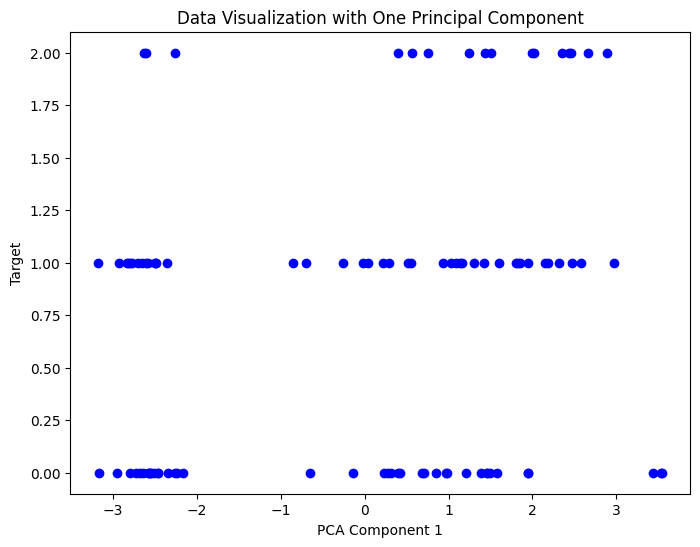

In [25]:
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Encode the target variable to numeric values for the y-axis
target_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
reduced_train_df['Target'] = reduced_train_df['Target'].map(target_mapping)

plt.scatter(reduced_train_df['PCA_Component1'], reduced_train_df['Target'], marker='o', color='b')
plt.title("Data Visualization with One Principal Component")
plt.xlabel("PCA Component 1")
plt.ylabel("Target")
plt.show()

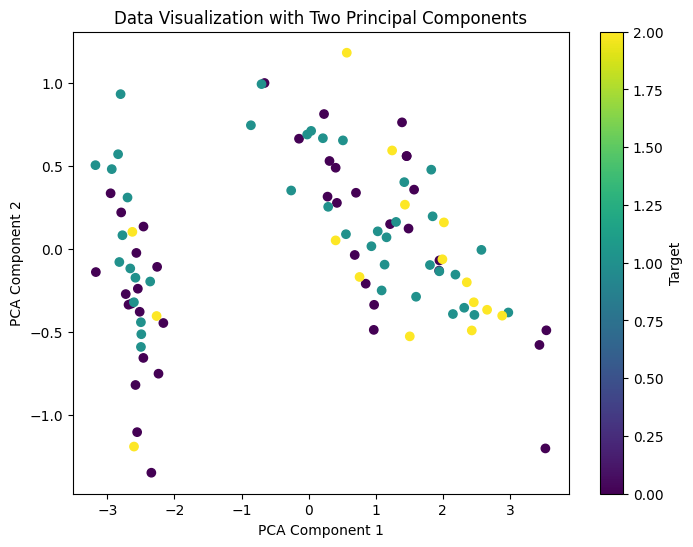

In [26]:
# Create a scatter plot in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(reduced_train_df['PCA_Component1'], reduced_train_df['PCA_Component2'], c=reduced_train_df['Target'], cmap='viridis')
plt.title("Data Visualization with Two Principal Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Target")
plt.show()

conclusions?

 PCA is a dimensionality reduction technique that can help you understand and visualize complex datasets. By reducing the data to a lower-dimensional space, you can often identify patterns and relationships more easily. Visualizations like scatter plots help you gain insights into how the data is structured and how different classes or clusters are separated. This can be valuable for various tasks, including classification and data exploration.

# More?

### Go to: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

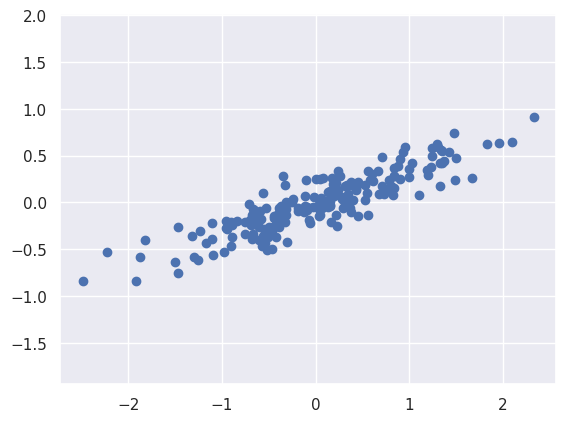

In [28]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [30]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [31]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


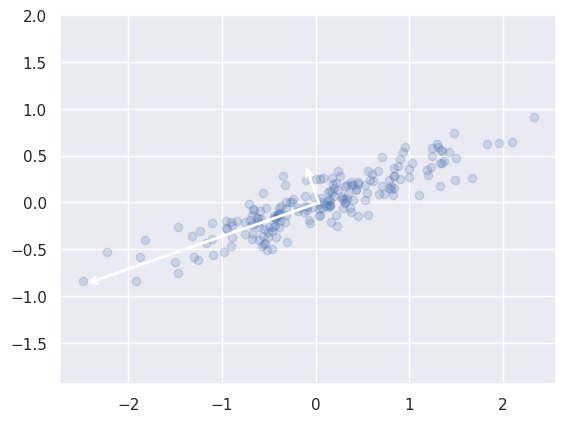

In [32]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [33]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


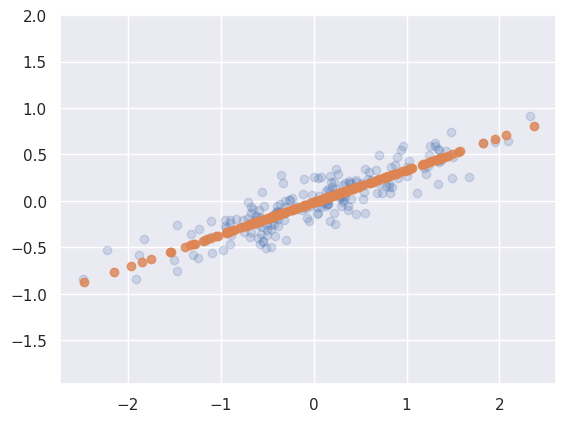

In [34]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [36]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


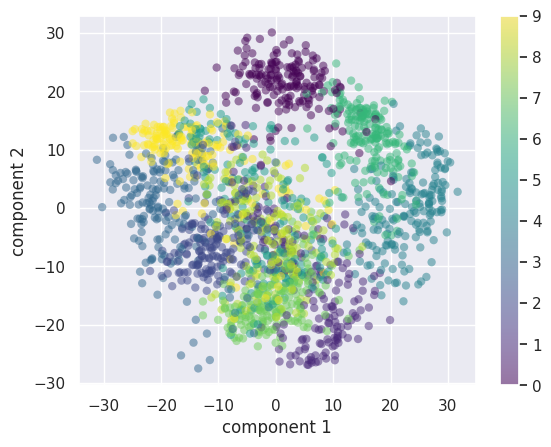

In [39]:
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, edgecolor='none', alpha=0.5,cmap='viridis')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

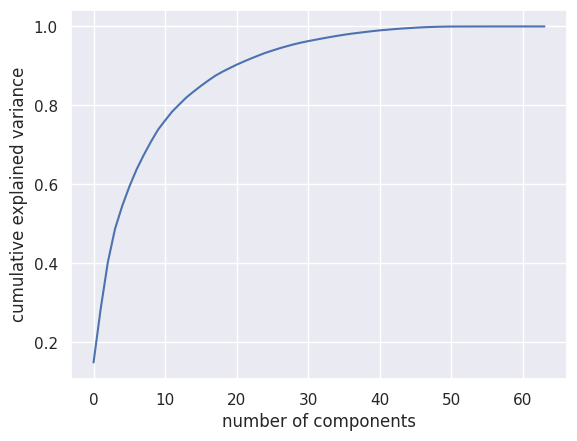

In [40]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


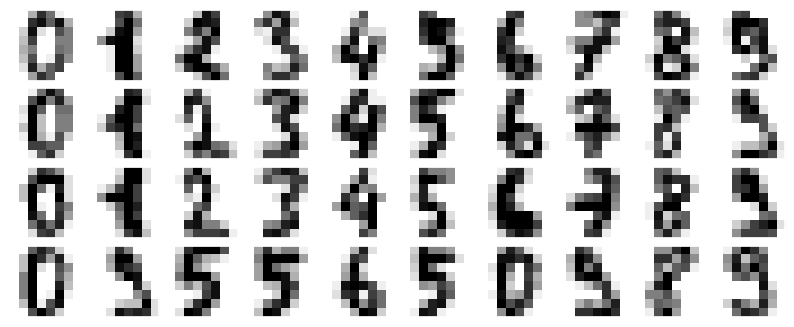

In [41]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

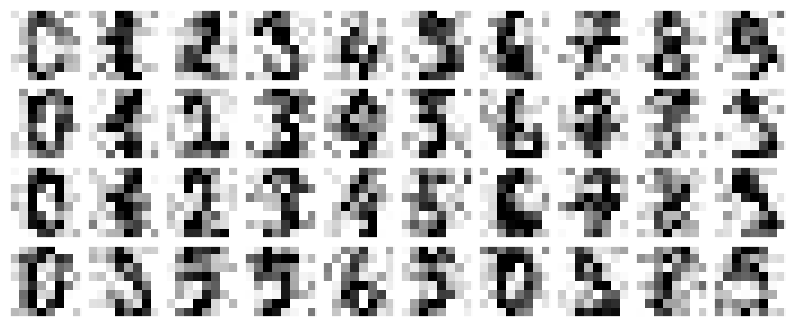

In [42]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [43]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

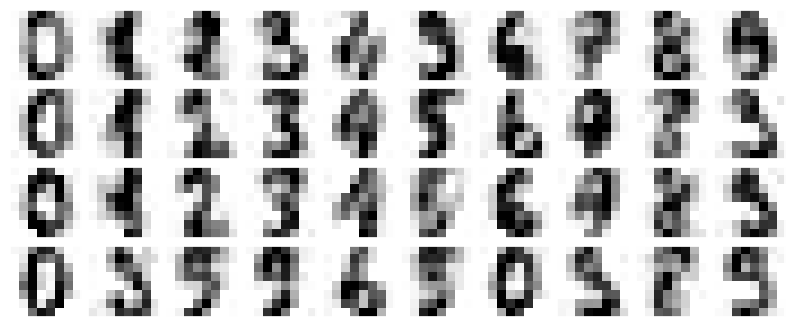

In [44]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

In [45]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [47]:
from sklearn.decomposition import PCA

# Create a PCA instance with the desired number of components (150 in your case)
pca = PCA(n_components=150)

# Fit the PCA model to your data
pca.fit(faces.data)

PCA(n_components=150)

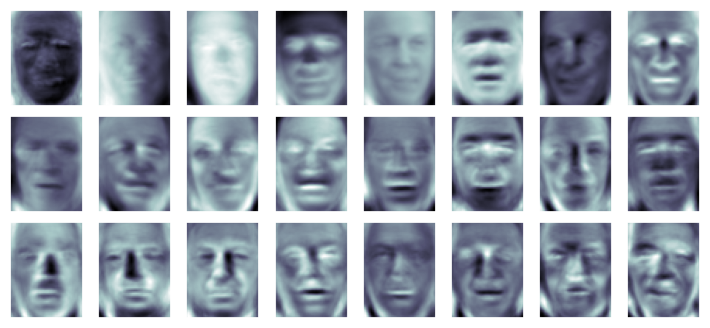

In [48]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

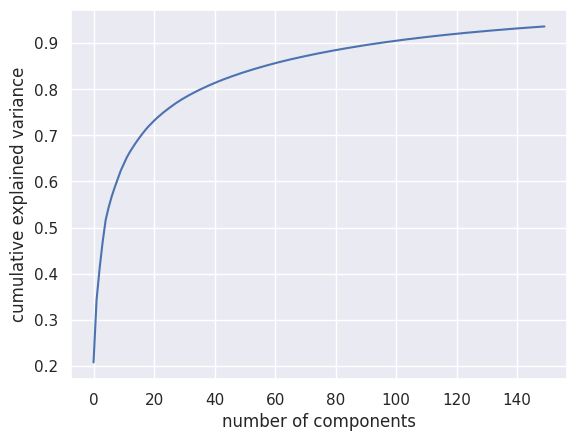

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [51]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

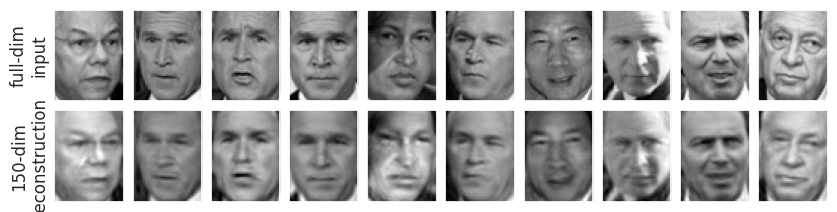

In [52]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');